# Imports

In [1]:
import pandas as pd

# ETL

In [3]:
df_bixi14 = pd.read_csv('./OD_2014.csv')
df_bixi_station14 = pd.read_csv('./Stations_2014.csv')

In [4]:
df_bixi14.info()
df_bixi14 = df_bixi14.drop(columns=["Unnamed: 0"])# Elimino la columna unnamed
# cambio a integer y datetime varias columnas
df_bixi14['start_station_code'] = pd.to_numeric(df_bixi14['start_station_code'] , errors='coerce' , downcast='integer')
df_bixi14['end_station_code'] = pd.to_numeric(df_bixi14['end_station_code'] , errors='coerce' , downcast='integer')
df_bixi14['start_date'] = pd.to_datetime(df_bixi14['start_date'])
df_bixi14['end_date'] = pd.to_datetime(df_bixi14['end_date'])
df_bixi14 = df_bixi14.dropna() # drop de valores null
df_bixi14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136276 entries, 0 to 3136275
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   start_date          object
 2   start_station_code  int64 
 3   end_date            object
 4   end_station_code    int64 
 5   duration_sec        int64 
 6   is_member           int64 
dtypes: int64(5), object(2)
memory usage: 167.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136276 entries, 0 to 3136275
Data columns (total 6 columns):
 #   Column              Dtype         
---  ------              -----         
 0   start_date          datetime64[ns]
 1   start_station_code  int16         
 2   end_date            datetime64[ns]
 3   end_station_code    int16         
 4   duration_sec        int64         
 5   is_member           int64         
dtypes: datetime64[ns](2), int16(2), int64(2)
memory usage: 131.6 MB


# Histograma

array([[<AxesSubplot:title={'center':'duration_sec'}>]], dtype=object)

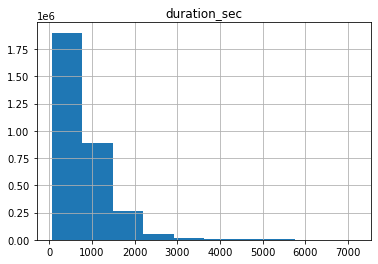

In [5]:
df_bixi14.hist(column='duration_sec') #Histograma

In [6]:
df_bixi14['start_station_code'].value_counts().nlargest(10) #top 10 estacion partida

6184    45600
6078    33241
6064    32055
6214    28224
6100    27072
6221    24448
6012    24274
6248    22578
6186    22279
6154    21799
Name: start_station_code, dtype: int64

In [7]:
df_bixi14['end_station_code'].value_counts().nlargest(10) # top 10 estación llegada

6184    43765
6078    39310
6064    34819
6012    34664
6015    31664
6034    27886
6100    26837
6043    24032
6032    23123
6009    21978
Name: end_station_code, dtype: int64

In [10]:
df_bixi14.groupby('start_station_code')['end_station_code'].value_counts().nlargest(10) #Top 10 viajes

start_station_code  end_station_code
6501                6501                2853
6026                6026                1809
6155                6184                1670
6154                6184                1660
6064                6100                1629
6396                6398                1617
6184                6155                1546
                    6154                1493
6064                6194                1413
6100                6064                1393
Name: end_station_code, dtype: int64

In [44]:
df_bixi14['start_date'].dt.time.value_counts().nlargest(100) # Hora punta

17:09:00    6588
17:07:00    6556
17:08:00    6533
17:11:00    6480
17:10:00    6446
            ... 
18:02:00    4702
18:13:00    4670
16:55:00    4645
08:37:00    4627
16:50:00    4626
Name: start_date, Length: 100, dtype: int64

In [45]:
df_bixi14['end_date'].dt.time.value_counts().nlargest(100) #Hora punta

17:27:00    6024
17:24:00    6017
17:35:00    6003
17:26:00    5993
17:23:00    5989
            ... 
08:50:00    4732
18:19:00    4729
16:54:00    4727
08:51:00    4720
17:04:00    4719
Name: end_date, Length: 100, dtype: int64